# Finding the Best Markets to Advertise In


![best markets](finding.jpeg)


We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

**Our goal in this project is to find out the two best markets to advertise our product in**.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2018-new-coder-survey).



In [1]:
# load libraries
import pandas as pd
import numpy as np
import chardet
import re

In [2]:
coder_survey = pd.read_csv("csv/2017-fCC-New-Coders-Survey-Data.csv",low_memory=False, encoding = 'utf-8' )

In [3]:
coder_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
datatype = coder_survey.dtypes
datatype_counter = datatype.value_counts()
datatype_counter

float64    105
object      31
dtype: int64

 ### Optimizing memory
 
 Let's see if we can reduce the memory space of the dataset we are working with.

In [5]:
for column in coder_survey.columns:
    if coder_survey[column].dtype == 'float64': 
        coder_survey[column] = coder_survey[column].astype('float32')
    if coder_survey[column].dtype == 'int64':
        coder_survey[column] = coder_survey[column].astype('int32')

In [6]:
coder_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float32(105), object(31)
memory usage: 11.6+ MB


In [7]:
pd.set_option("display.max_columns", None)

In [8]:
coder_survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Data Exploration

### Understanding the Data:

- Why I'm using a ready-made data set instead of organizing a survey?.

    - I wanted to get a large sample size quickly and efficiently, so I decided to use pre-existing data instead of conducting my own survey." althought it may not be the best option for every situation.


- What's this data set about.

    - An anonymous survey of thousands of people who started coding less than 5 years ago.
    
- Where can this data set be downloaded.
    - [Download 2017-fCC-New-Coders-Survey-Data.csv](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv)
    


In [9]:
coder_survey['Age'].unique()

array([27., 34., 21., 26., 20., 28., 29., 23., 24., 22., 18., 44., 32.,
       46., 31., 30., 19., 54., 37., 36., 16., 17., 25., nan, 45., 48.,
       33., 43., 35., 42., 53., 15., 41., 60., 39., 38., 56., 52., 13.,
       14., 69., 40., 50., 47., 57., 59., 12., 58., 70., 68., 51., 11.,
       49., 73., 55., 71., 67., 72.,  1., 10., 61., 62., 63.,  0., 76.,
        8., 90., 66.,  2.,  5., 65.,  3., 64., 75.], dtype=float32)

In [10]:
coder_survey['CityPopulation'].value_counts()

more than 1 million              6534
between 100,000 and 1 million    5276
less than 100,000                3544
Name: CityPopulation, dtype: int64

In [11]:
coder_survey['CountryCitizen'].value_counts().head(10)

United States of America    5480
India                       1594
United Kingdom               640
Canada                       564
Brazil                       399
Poland                       297
Russia                       294
Germany                      251
Ukraine                      246
France                       245
Name: CountryCitizen, dtype: int64

In [12]:
coder_survey['MonthsProgramming'].unique()

array([  6.,   5.,  24.,  12.,   4.,  29.,  18.,   1.,   3.,  nan,   9.,
        40.,  14.,  28.,  20.,   2.,   0.,  25.,   8.,  32.,  15.,  16.,
        48.,  10.,  26.,  60., 200.,  36.,  30.,  52.,  58.,  19.,  45.,
        50.,  54., 100.,  80., 120.,  22.,  72.,   7.,  43.,  13.,  17.,
        84.,  21.,  66.,  11.,  96.,  49., 744.,  55.,  35., 250., 240.,
        90., 572.,  42.,  51., 192.,  39.,  70., 202.,  86.,  38.,  27.,
        33.,  34.,  59., 180.,  23., 108.,  46.,  68.,  65.,  44.,  41.,
       105., 168., 110., 190., 150.,  31., 204., 480., 300.,  56., 600.,
       140., 160., 228.,  57.,  75.,  87., 400.,  85., 156., 130., 135.,
       360., 132.,  82., 743.,  95., 113., 124.,  76.,  64., 370., 144.,
       264.,  62.,  73.,  83., 123.,  63., 336., 114.,  78., 111.,  47.,
       432., 216., 244.,  37.,  92., 720., 230.,  94., 103.,  69.,  53.,
       500., 115., 136., 312., 276., 171., 198.,  67.,  97.,  99.,  61.,
       450., 220.,  98., 205., 127., 420., 107., 34

In [13]:
coder_survey['MoneyForLearning'].value_counts().head(10)

0.0       7985
100.0     1166
200.0      789
500.0      631
50.0       577
1000.0     521
300.0      465
20.0       314
2000.0     255
150.0      241
Name: MoneyForLearning, dtype: int64

In [14]:
coder_survey['JobRoleInterest'].head(10)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
5                                                  NaN
6                             Full-Stack Web Developer
7                                                  NaN
8                                                  NaN
9    Full-Stack Web Developer,   Quality Assurance ...
Name: JobRoleInterest, dtype: object

This column represents the choice of the different users but as we can see there are users who have felt interested in more than one role.

In statistics, a representative sample is a sample that adequately represents the individuals in a population. That is, a representative sample is a part of a population whose characteristics are similar to the characteristics of the population it represents. 

For a sample to be representative it must have the same characteristics as the population, in this way statistical parameter calculations can be made with the sample data that serve as estimates of the population parameters.


We will focus only answering questions about the population of new programmers who are interested in our offer of courses on mobile and web development.

However, first of all it is interesting to create a frequency distribution table, taking percentages. From this table the following questions must be answered: 

 - Are people interested only in one topic or on the contrary are interested in more than one topic. 

 - If most people are interested in more than one topic the sample is still representative. 
 
 - How many people are interested in web or mobile applications.


<br>

To create a frequency distribution first let's see if we have null values in our series.

- `isnull()` y `isna()`: 

This methods are equivalent and are used to check for null values in a DataFrame or in a Series. 

Both methods return a Boolean DataFrame/Series of the same size as the original, indicating with True where null values are found and False where null values are not found.

In [15]:
### Same as official solution

coder_survey['JobRoleInterest'].isnull().value_counts()

True     11183
False     6992
Name: JobRoleInterest, dtype: int64

Let's delete rows that contain null values

In [16]:
### Same as official solution

coder_survey['JobRoleInterest'].dropna(axis = 0, inplace=True)

In [17]:
coder_survey['JobRoleInterest'].isnull().sum() # I do dropna of the column but I see that I do nothing.

11183

When I see that the dropna method does not work, the first thing I do is see what type of data the series is.

In [18]:
coder_survey['JobRoleInterest'].dtype

dtype('O')

When `dtype('O')` is displayed in pandas, it refers to the object data type, which can contain a variety of data types, including text and other non-numeric object types. 

Some common examples of data types that are represented as `dtype('O')`in pandas are:

- **str (text strings)**
- **datetime (dates and times)**
- **bool (Boolean values)**
- **list**
- **dict (dictionaries)**
- **tuple (tuples)**
- **set (sets)**
- **None (null values)**

Apparently for `.dropna()` to work the series must have a specific data type and it is not enough to be `type(O)`, so let's convert the series into a `str` data type.

In [19]:
coder_survey['JobRoleInterest'] = coder_survey['JobRoleInterest'].astype(str)
coder_survey['JobRoleInterest'].replace(['nan'], np.nan, inplace=True)
coder_survey.dropna(subset=['JobRoleInterest'], inplace=True)
#coder_survey['JobRoleInterest'].dropna(axis = 0, inplace=True)
coder_survey['JobRoleInterest'].isnull().sum() # Check

0

We have removed the rows that contained NA values, this means that the length of the dataset has been modified. Let's check it out

In [20]:
coder_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float32(105), object(31)
memory usage: 4.5+ MB



---

---

As each user has chosen more than one option, it affects us in the resentativity of the data. As we will see below, these data are not accessible by our methods and clearly affect our result.

We will see it better with an example.

In [21]:
# example
# We create a dictionary with the data
data = {'col1': ['user_1', 'user_2', 'user_3', 'user_4'],
        'col2': ['option_A', ['option_BB','option_CC'], 'option_C', ['option_BB','option_EE','option_FF']],
        'col3': [True, False, True, False]}

# and the dataframe
df = pd.DataFrame(data)

# Mostrar el dataframe
print(df)

     col1                               col2   col3
0  user_1                           option_A   True
1  user_2             [option_BB, option_CC]  False
2  user_3                           option_C   True
3  user_4  [option_BB, option_EE, option_FF]  False


In [22]:
# example
optionenB = df['col2'].str.contains('option_BB') # returns an array of booleans
freq_table = optionenB.value_counts(normalize = True) * 100
print(freq_table)

False    100.0
Name: col2, dtype: float64


With the following example that every element that is contained in the list will not be taken into account by the `str.contains` method, the result returned by contains is 100% false.

With `.explode` transform all `col2` element of a list-like to a row that affects us entirely to the dataframe.

- We reset the index since when repeating rows the index to which it corresponded will also repeat them.

In [23]:
# example
new_df = df.explode('col2').reset_index(drop=True)
new_df

,col1,col2,col3
0,user_1,option_A,True
1,user_2,option_BB,False
2,user_2,option_CC,False
3,user_3,option_C,True
4,user_4,option_BB,False
5,user_4,option_EE,False
6,user_4,option_FF,False


Let's go back to doing the search we did at the beginning.

In [24]:
# example
optionenB = new_df['col2'].str.contains('option_BB') # returns an array of booleans
freq_table = optionenB.value_counts(normalize = True) * 100
print(freq_table)

False    71.428571
True     28.571429
Name: col2, dtype: float64


In this way we take into account representativeness, a sample that adequately represents the individuals of a population.

### 1.0 Creating the new dataframe

---

---

Therefore before making the frequency table we will make the data of our dataframe as representative as possible.


In [25]:
# Create a new dataframe from the column 'col2' decomposed into 33783 individual elements
coder_survey['JobRoleInterest'].str.split(',').explode().reset_index(drop=True)

0         Full-Stack Web Developer
1          Front-End Web Developer
2           Back-End Web Developer
3                DevOps / SysAdmin
4                 Mobile Developer
                   ...            
22595         Information Security
22596               IT specialist 
22597       Back-End Web Developer
22598                Data Engineer
22599               Data Scientist
Name: JobRoleInterest, Length: 22600, dtype: object

### 1.1 Creating the new dataframe

In [26]:
# new dataframe
new_df = pd.DataFrame({
    col: np.repeat(coder_survey[col].values, coder_survey['JobRoleInterest'].str.split(',').apply(len))
    for col in coder_survey.columns if col != 'JobRoleInterest'
})

new_df['JobRoleInterest'] = coder_survey['JobRoleInterest'].str.split(',').explode().reset_index(drop=True)
new_df['JobRoleInterest'].head(5)

0     Full-Stack Web Developer
1      Front-End Web Developer
2       Back-End Web Developer
3            DevOps / SysAdmin
4             Mobile Developer
Name: JobRoleInterest, dtype: object

In [27]:
new_df['JobRoleInterest'].dtypes

dtype('O')

In [28]:
new_df.dropna(subset=['JobRoleInterest'], inplace=True)
new_df['JobRoleInterest'] = new_df['JobRoleInterest'].astype(str)
#new_df['JobRoleInterest'].replace(['nan'], np.nan, inplace=True)
#new_df.dropna(subset=['JobRoleInterest'], inplace=True)

It may seem that it is not important but as we will see below, extracting the spaces from the column will show us a big difference in the count clean up the blanks as the amount of elements varies dramatically

In [29]:
new_df['JobRoleInterest'].isnull().sum()

0

In [30]:
new_df['JobRoleInterest'].dtypes

dtype('O')

In [31]:
new_df['JobRoleInterest'].value_counts().head(5) # without cleaning the blanks

 Full-Stack Web Developer     2490
   Front-End Web Developer    2287
 Back-End Web Developer       1997
   Mobile Developer           1734
Full-Stack Web Developer      1708
Name: JobRoleInterest, dtype: int64

In [32]:
new_df['JobRoleInterest'] = new_df['JobRoleInterest'].str.strip() # Removing white space
new_df['JobRoleInterest'].head(5)

0    Full-Stack Web Developer
1     Front-End Web Developer
2      Back-End Web Developer
3           DevOps / SysAdmin
4            Mobile Developer
Name: JobRoleInterest, dtype: object

In [33]:
new_df['JobRoleInterest'].value_counts().head(10) # The result of having cleaned up the blanks is evident

Full-Stack Web Developer    4198
Front-End Web Developer     3533
Back-End Web Developer      2772
Mobile Developer            2304
Data Scientist              1643
Game Developer              1628
User Experience Designer    1469
Information Security        1326
Data Engineer               1248
DevOps / SysAdmin            927
Name: JobRoleInterest, dtype: int64

In [34]:
table_of_frequecy = new_df['JobRoleInterest'].value_counts(normalize=True) * 100
table_of_frequecy.head(10)

Full-Stack Web Developer    18.575221
Front-End Web Developer     15.632743
Back-End Web Developer      12.265487
Mobile Developer            10.194690
Data Scientist               7.269912
Game Developer               7.203540
User Experience Designer     6.500000
Information Security         5.867257
Data Engineer                5.522124
DevOps / SysAdmin            4.101770
Name: JobRoleInterest, dtype: float64

Having cleared up blanks has allowed us to group the roles much more clearly, so as we need to select the courses between `'Web Developer|Mobile Developer'` eliminating typos, which as we will see hereafter. 

To do this we will use the regular expressions and indicate that we want to visualize all the elements with the regular pattern in common.

In [35]:
mine_value_counts= new_df['JobRoleInterest'].value_counts()
mine_value_counts

mine_value_counts[mine_value_counts.index.str.contains('[M-m]obile')]

Mobile Developer      2304
mobile developer         1
Mobile Development       1
Name: JobRoleInterest, dtype: int64

In [36]:
mine_value_counts[mine_value_counts.index.str.contains('[W-w]eb')]

Full-Stack Web Developer                         4198
Front-End Web Developer                          3533
Back-End Web Developer                           2772
Web Designer                                        2
Entreprenuer / Web Dev Hustler                      1
web                                                 1
Web Design                                          1
Front End Web Development                           1
Web developer                                       1
Software Developer or Front-End Web Developer       1
Web development                                     1
Front-End Web Designer                              1
Name: JobRoleInterest, dtype: int64

<br>

It is not a surprise to find typographical errors derived from the nature of the survey. 

Now we know that we must correct.

In [37]:
# Movile Developer

replacement_mobile_dict = {"mobile":"Mobile",
                           "developer":"Developer",
                           "development":"Developer",
                           "Development":"Developer"}

for to_replace in replacement_mobile_dict:
    new_df['JobRoleInterest'] = new_df['JobRoleInterest'].str.replace(to_replace,replacement_mobile_dict[to_replace])

In [38]:
# Full Stack Web Developer / Front End Web Developer / Back End Web Developer Web Designer
# Front End Web Designer / Front End Web Developer / Front End Web Designer

replacement_web_dict = {"Full-Stack Web Developer":"Full Stack Web Developer",
                        "Front-End Web Developer":"Front End Web Developer",
                        "Back-End Web Developer":"Back End Web Developer",
                        "Web Design":"Web Designer",
                        "Front-End Web Designer":"Front End Web Designer",
                        "Software Developer or Front-End Web Developer":"Front End Web Developer",
                        "Front-End Web Designer":"Front End Web Designer"}

for to_replace in replacement_web_dict:
    new_df['JobRoleInterest'] = new_df['JobRoleInterest'].str.replace(to_replace,replacement_web_dict[to_replace])

In [39]:
coder_survey['JobRoleInterest'].isna().sum()

0

In [40]:
new_df['JobRoleInterest'] = new_df['JobRoleInterest'].str.strip()
graphica = new_df['JobRoleInterest'].value_counts().head(20)
new_df['JobRoleInterest'].value_counts().head(10)

Full Stack Web Developer    4198
Front End Web Developer     3534
Back End Web Developer      2772
Mobile Developer            2306
Data Scientist              1643
Game Developer              1628
User Experience Designer    1469
Information Security        1326
Data Engineer               1248
DevOps / SysAdmin            927
Name: JobRoleInterest, dtype: int64

In [41]:
mask_ndf = new_df['JobRoleInterest'].str.contains('[W-w]eb|[M-m]obile') # returns an array of booleans
freq_table = mask_ndf.value_counts(normalize = True) * 100
print(freq_table)

True     56.721239
False    43.278761
Name: JobRoleInterest, dtype: float64


In [42]:
new_df.loc[mask_ndf,"JobRoleInterest"].value_counts().sum()

12819

In [43]:
new_df.shape

(22600, 136)

In [44]:
mask_ndf = new_df['JobRoleInterest'].str.contains('[W-w]eb|[M-m]obile') # returns an array of booleans
freq_table = mask_ndf.value_counts(normalize = True) * 100
print(freq_table)

True     56.721239
False    43.278761
Name: JobRoleInterest, dtype: float64


In [45]:
new_df.value_counts()
mine_value_counts = new_df['JobRoleInterest'].value_counts()
mine = mine_value_counts.reset_index() # my solution
mine_value_counts[mine_value_counts.index.str.contains('[W-w]eb')]

Full Stack Web Developer                         4198
Front End Web Developer                          3534
Back End Web Developer                           2772
Web Designerer                                      2
Web Developer                                       2
Entreprenuer / Web Dev Hustler                      1
web                                                 1
Web Designer                                        1
Software Developer or Front End Web Developer       1
Front End Web Designerer                            1
Name: JobRoleInterest, dtype: int64

In [46]:
new_df.value_counts()
mine_value_counts = new_df['JobRoleInterest'].value_counts()
mine = mine_value_counts.reset_index() # my solution
mine_value_counts[mine_value_counts.index.str.contains('[M-m]obile')]

Mobile Developer    2306
Name: JobRoleInterest, dtype: int64

In [47]:
mine_value_counts[mine_value_counts.index.str.contains('[M-m]obile')]

Mobile Developer    2306
Name: JobRoleInterest, dtype: int64

In [48]:
seleccion_web = new_df['JobRoleInterest'].value_counts(normalize = True).head(10)[0:3].sum() * 100
seleccion_mobile = new_df['JobRoleInterest'].value_counts(normalize = True).head(10)[3:4].sum() * 100
seleccion_total = seleccion_web + seleccion_mobile

print(f"Web:    {seleccion_web} \nMobile: {seleccion_mobile} \ntotal:  {seleccion_total}")

Web:    46.477876106194685 
Mobile: 10.20353982300885 
total:  56.68141592920354


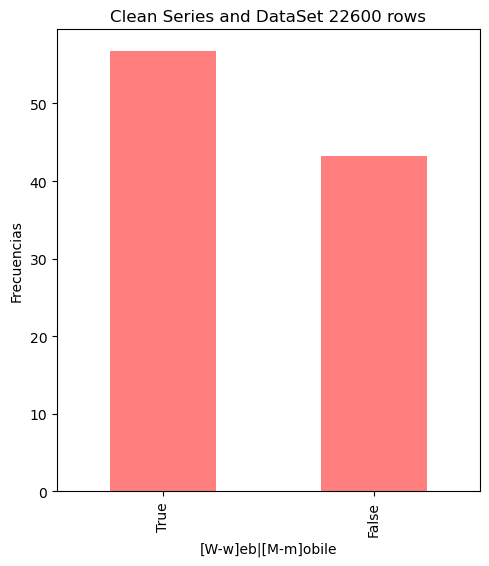

In [49]:
import matplotlib.pyplot as plt

# Gráfico de barras para la Tabla 1
plt.figure(figsize=(12, 6))  # Tamaño de la figura (opcional)

# Subplot 1: Tabla 1
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, primer subplot
freq_table.plot.bar(alpha=0.5, color="red")
plt.xlabel('[W-w]eb|[M-m]obile')
plt.ylabel('Frecuencias')
plt.title('Clean Series and DataSet 22600 rows')

#plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

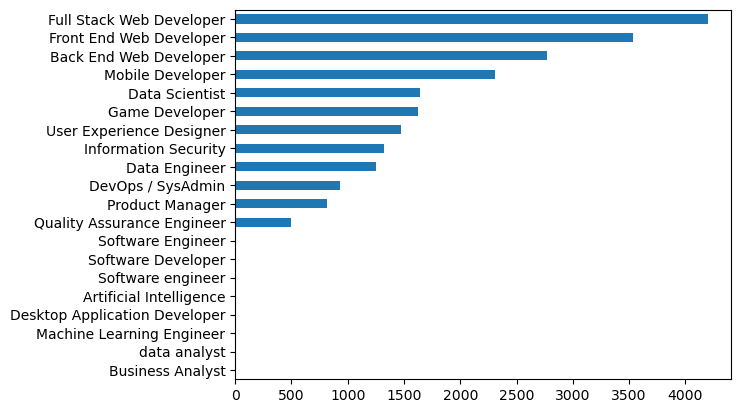

In [50]:
# Graficar la columna de la serie

import matplotlib.pyplot as plt
%matplotlib inline

ax = graphica.plot(kind='barh')

ax.invert_yaxis()
plt.show()




- A frequency distribution table was generated for a `JobRoleInterest` column in the DataFrame. Instead of using absolute frequencies, the corresponding percentages were calculated.

```

Full-Stack Web Developer    18.575221
Front-End Web Developer     15.632743
Back-End Web Developer      12.265487
Mobile Developer            10.194690
Data Scientist               7.269912
Game Developer               7.203540
User Experience Designer     6.500000
Information Security         5.867257
Data Engineer                5.522124
DevOps / SysAdmin            4.101770
Name: JobRoleInterest, dtype: float64

```

- An analysis of the obtained table was conducted. The question was raised regarding whether people are interested in only one subject or if they can be interested in more than one. It was mentioned that the presence of multiple choices in this column led to modifying the entire DataFrame.

- The representativeness of the sample was discussed in case the majority of people were interested in more than one subject. It was concluded that the sample remains representative as multiple choices were extracted from the rows and the DataFrame was modified accordingly.

- Additionally, it was mentioned that the focus of the courses is on web and mobile development, and the question was posed about how many people are interested in at least one of these two subjects. The results showed that there are 4198 individuals interested in Full Stack Web Development and 2306 individuals interested in Mobile Development.


|||
|:--|:--|
||**# people interested**|
|**Web**||
|Full Stack Web Developer|4198|
|Front End Web Developer|3534|
|Back End Web Developer|2772|
|**Mobile**||
|Mobile Developer|2306|
|||
||**% people interested**|
|**Web**:|46.477876106194685 |
|**Mobile**:|10.20353982300885 |
|**total**:|56.68141592920354|


There are a greater number of people interested in web programming compared to mobile development. 


Among the specialties of Web development, the most popular is "Full Stack Web Developer", with 4,198 interested people, followed by "Front End Web Developer" with 3,534 interested people, and "Back End Web Developer" with 2,772 interested people.

In the mobile development category, the most prominent specialty is "Mobile Developer", Web programming attracts approximately 46.48% of the total interested people, while mobile development attracts approximately 10.20%. 

Together, both web and mobile development account for approximately 56.68% of the total number of people interested. 


These conclusions are based on the data provided and can help to have an overview of people's preference in terms of web and mobile development.

In [51]:
def frecuency_table(df, serie):
    # Isolate the participants that answered what role they'd be interested in
    fcc = df[df[serie].notnull()].copy()

    # Frequency tables with absolute and relative frequencies
    absolute_frequencies = fcc[serie].value_counts()
    relative_frequencies = fcc[serie].value_counts(normalize = True) * 100

    # Display the frequency tables in a more readable format
    print(pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            ).head(20))
    

In [52]:
frecuency_table(new_df, 'JobRoleInterest' )

                               Absolute frequency  Percentage
Full Stack Web Developer                     4198   18.575221
Front End Web Developer                      3534   15.637168
Back End Web Developer                       2772   12.265487
Mobile Developer                             2306   10.203540
Data Scientist                               1643    7.269912
Game Developer                               1628    7.203540
User Experience Designer                     1469    6.500000
Information Security                         1326    5.867257
Data Engineer                                1248    5.522124
DevOps / SysAdmin                             927    4.101770
Product Manager                               814    3.601770
Quality Assurance Engineer                    498    2.203540
Software Engineer                              11    0.048673
Software Developer                              8    0.035398
Software engineer                               4    0.017699
Artifici

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

we're interested where people are located `CountryLive`, not where they were born.

we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customer

Let's start by generating a frequency table with `new_df['CountryLive']`

In [53]:
null_JobRoleInterest = new_df['CountryLive'].isnull().sum()
null_JobRoleInterest

480

In [54]:
new_df.dropna(subset=['CountryLive'],inplace=True)

In [55]:
null_JobRoleInterest = new_df['CountryLive'].isnull().sum()
null_JobRoleInterest

0

In [56]:
new_df.loc[:,'money_spent_monthly'] = new_df['MoneyForLearning'].div(new_df['MonthsProgramming'], fill_value=1)

In [57]:
new_df.dropna(subset=['money_spent_monthly'], inplace=True)

In [58]:
new_df['money_spent_monthly'].isnull().sum()

0

In [59]:
frecuency_table(new_df,'CountryLive')

                               Absolute frequency  Percentage
United States of America                    10176   48.369617
India                                        1535    7.296321
United Kingdom                                964    4.582185
Canada                                        861    4.092594
Germany                                       388    1.844282
Brazil                                        378    1.796749
Poland                                        343    1.630383
Australia                                     321    1.525810
Russia                                        246    1.169313
Nigeria                                       241    1.145546
Ukraine                                       203    0.964921
Spain                                         201    0.955414
Italy                                         200    0.950661
France                                        196    0.931647
Netherlands (Holland, Europe)                 195    0.926894
Philippi

In [60]:
grouped = new_df.groupby('CountryLive') # money_spent_monthly
happy_grouped = grouped['money_spent_monthly'].mean()
happy_grouped.value_counts

<bound method IndexOpsMixin.value_counts of CountryLive
Afghanistan                 0.000000
Albania                     8.466666
Algeria                     0.055556
Angola                    116.666664
Anguilla                    0.000000
                            ...     
Venezuela                   2.808402
Vietnam                   166.283615
Virgin Islands (USA)       33.035713
Yemen                   10000.000000
Zimbabwe                   59.250000
Name: money_spent_monthly, Length: 136, dtype: float32>

In [61]:
country_counts = new_df.groupby('CountryLive').size()

# Obtener los países con el mayor recuento
top_countries = country_counts.nlargest(4)
top_countries

CountryLive
United States of America    10176
India                        1535
United Kingdom                964
Canada                        861
dtype: int64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the money_per_month variable for each country.

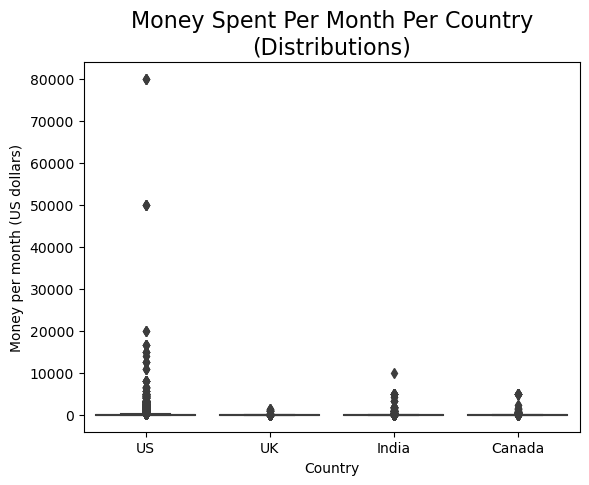

In [62]:
# Isolate only the countries of interest
only_4 = new_df[new_df['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_spent_monthly', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month 
20,000 per month.

In [63]:
# Isolate only those participants who spend less than 10000 per month
new_df = new_df[new_df['money_spent_monthly'] < 20000]

In [64]:
# Recompute mean sum of money spent by students each month
countries_mean = new_df.groupby('CountryLive').mean()
countries_mean['money_spent_monthly'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

/tmp/ipykernel_58733/967813569.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries_mean = new_df.groupby('CountryLive').mean()


CountryLive
United States of America    186.967239
India                       125.321541
United Kingdom               33.781868
Canada                      128.602203
Name: money_spent_monthly, dtype: float32

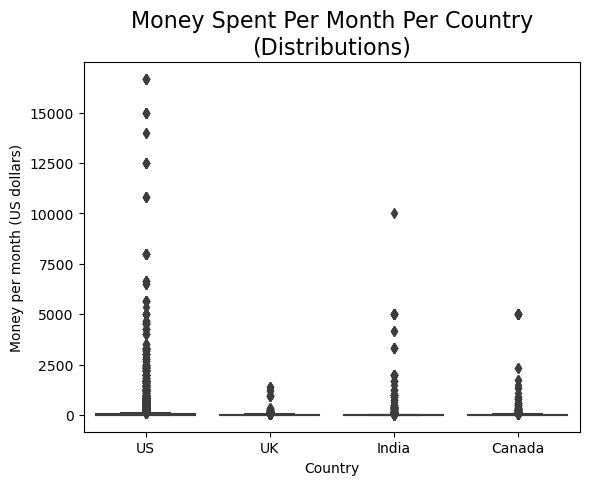

In [65]:
# Isolate only the countries of interest
only_4 = new_df[new_df['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_spent_monthly', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. 

Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [66]:
# Inspect the extreme outliers for India
india_outliers = only_4[(only_4['CountryLive'] == 'India') & (only_4['money_spent_monthly'] >= 2500)]
india_outliers.tail(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest,money_spent_monthly
11577,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Aerospace and Aeronautical Engineering,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back End Web Developer,5000.000000
11578,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. 

The actual question of the survey was:

- "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"

so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [67]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # using the row labels

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [68]:
# Examine the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spent_monthly'] >= 6000)]

us_outliers.tail(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest,money_spent_monthly
20697,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,NaN,1.0,NaN,male,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,400000.0,40.0,e1925d408c973b91cf3e9a9285238796,7e9e3c31a3dc2cafe3a09269398c4de8,NaN,1.0,1.0,0.0,NaN,I'm already applying,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,in an office with other developers,English,married or domestic partnership,200000.0,12.0,1a45f4a3ef,2017-03-14 02:42:57,2017-03-14 02:40:10,2017-03-14 02:45:55,2017-03-14 02:43:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,associate's degree,Computer Programming,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Back End Web Developer,16666.666016
20698,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,NaN,1.0,NaN,male,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,400000.0,40.0,e1925d408c973b91cf3e9a9285238796,7e9e3c31a3dc2cafe3a09269398c4de8,NaN,1.0,1.0,0.0,NaN,I'm already applying,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,in an office with other developers,English,married or domestic partnership,200000.0,12.0,1a45f4a3ef,2017-03-14 02:42:57,2017-03-14 02:40:10,2017-03-14 02:45:55,2017-03-14 02:43:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,associate's degree,C

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

Didn't attend bootcamps.
Had been programming for three months or less when at the time they completed the survey.

In [69]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spent_monthly'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spent_monthly'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [70]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_spent_monthly'] > 4500)]

canada_outliers.tail()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest,money_spent_monthly
21042,45.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Canada,Canada,NaN,NaN,Not working but looking for work,NaN,55000.0,0.0,NaN,male,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,9e27e1905ed525546127b00c07debee1,250d7a51891189d1edd3530f19573692,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,NaN,from home,Turkish,married or domestic partnership,5000.0,NaN,899c7c7902,2017-03-18 19:58:06,2017-03-18 19:52:09,2017-03-18 20:01:20,2017-03-18 19:58:11,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Engineering,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Engineer,5000.0
21043,45.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Canada,Canada,NaN,NaN,Not working but looking for work,NaN,55000.0,0.0,NaN,male,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,9e27e1905ed525546127b00c07debee1,250d7a51891189d1edd3530f19573692,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,NaN,from home,Turkish,married or domestic partnership,5000.0,NaN,899c7c7902,2017-03-18 19:58:06,2017-03-18 19:52:09,2017-03-18 20:01:20,2017-03-18 19:58:11,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Engineering,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Stack Web Developer,5000.0
21044,4

Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [71]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)

Let's recompute the mean values and generate the final box plots.

In [72]:
# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['money_spent_monthly']

/tmp/ipykernel_58733/3832654560.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  only_4.groupby('CountryLive').mean()['money_spent_monthly']


CountryLive
Canada                       53.657627
India                        60.409370
United Kingdom               33.781868
United States of America    140.338974
Name: money_spent_monthly, dtype: float32

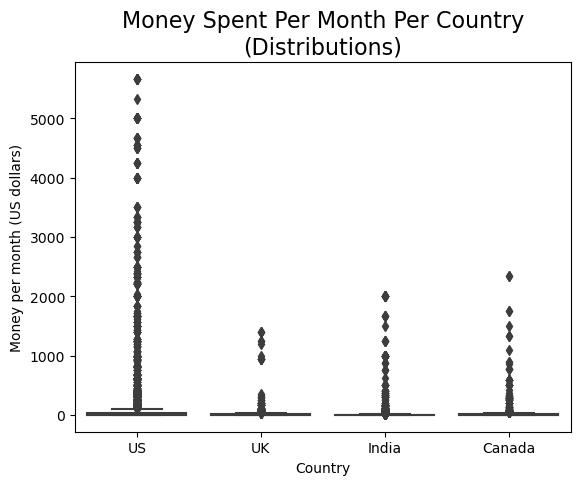

In [73]:
# Visualize the distributions again
sns.boxplot(y = 'money_spent_monthly', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $140).

We sell subscriptions at a price of 
93 per month, compared to India (
60 ).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

60 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [74]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    75.261819
India                       11.220826
United Kingdom               7.196290
Canada                       6.321065
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.